In [1]:
import tempfile
import subprocess
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_pydot(description):
    with tempfile.NamedTemporaryFile(mode="w") as tmp1:
        tmp1.write(description)
        tmp1.flush()
        bashCommand = f"dot -Tpng {tmp1.name}"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        display(Image(output))

In [2]:
class Node:
    counter = 1
    
    def __init__(self, label, depth):
        self.children = {}
        self.label = label
        self.link = None
        self.id = Node.counter
        self.depth = depth
        Node.counter += 1
        
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
    def dot_edges(self, links=True):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        if self.link and links:
            result.append(f'{self.id} -> {self.link.id}[color="blue"];')
        return "\n".join(result)
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    def show(self, links=True):
        nodes = self.all_children()
        Node.show_graph(nodes, links=links)
    
    @staticmethod
    def show_graph(nodes, links=True):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges(links) + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)

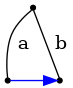

In [3]:
root = Node("",0)
a = Node("a", 1)
b = Node("b", 1)
root.children["a"] = a
root.children["b"] = b
a.link = b

root.show()